In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
wine_quality = pd.read_csv('./data/winequality-red.csv')
print(wine_quality.head().T)

                            0        1       2       3        4
fixed acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile acidity       0.7000   0.8800   0.760   0.280   0.7000
citric acid            0.0000   0.0000   0.040   0.560   0.0000
residual sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free sulfur dioxide   11.0000  25.0000  15.000  17.000  11.0000
total sulfur dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000
quality                5.0000   5.0000   5.000   6.000   5.0000


In [3]:
wine_quality.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

<Figure size 1000x600 with 0 Axes>

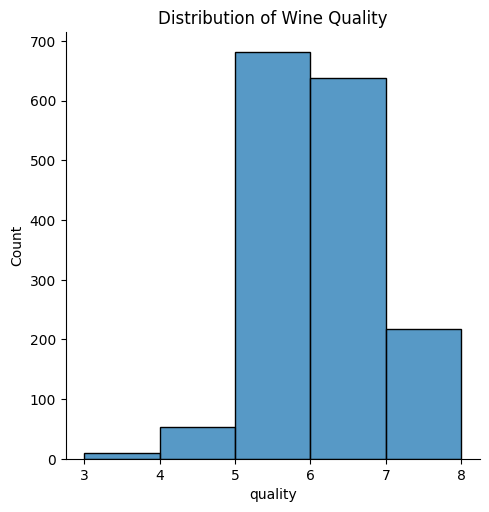

In [4]:
plt.figure(figsize=(10, 6))
sns.displot(data=wine_quality, 
            x='quality', 
            binwidth=1,
            )
plt.title('Distribution of Wine Quality')
plt.savefig('./images/ch07_16.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

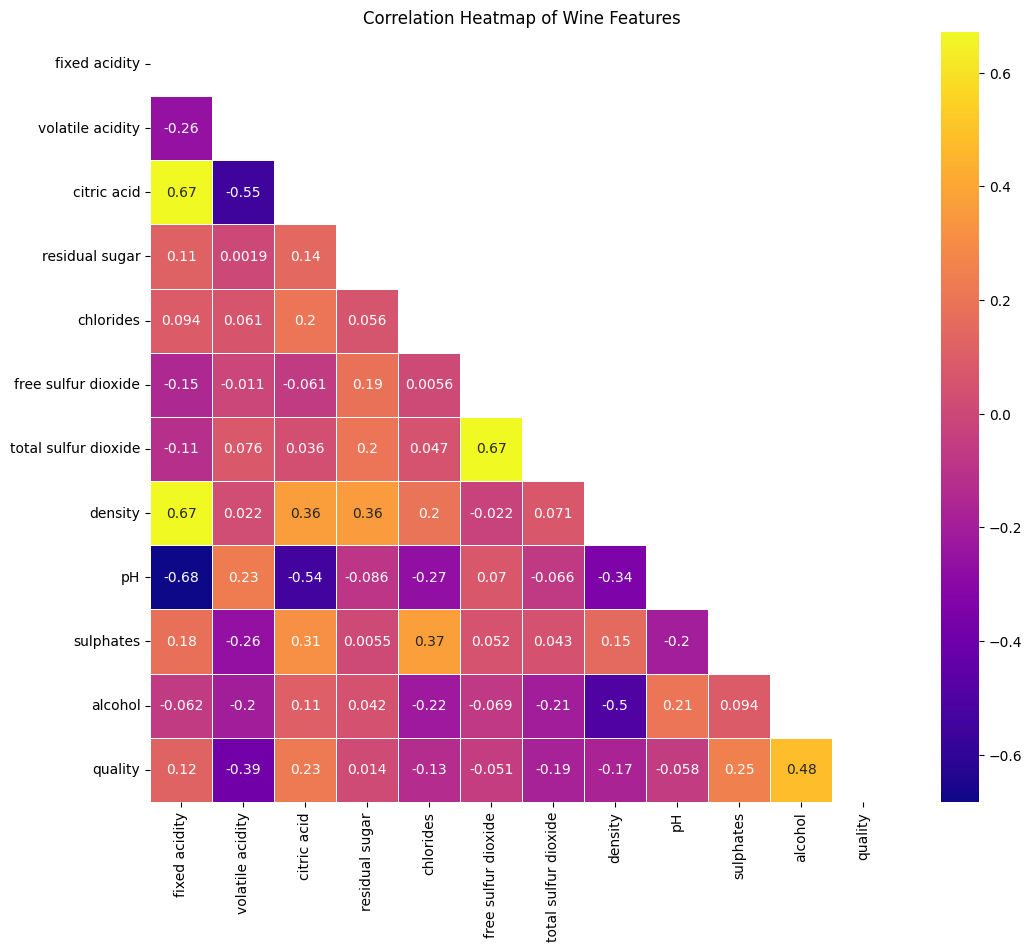

In [78]:
plt.figure(figsize=(12, 10))
corr=wine_quality.corr()
# Mask to hide upper matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.savefig('./images/ch07_17.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

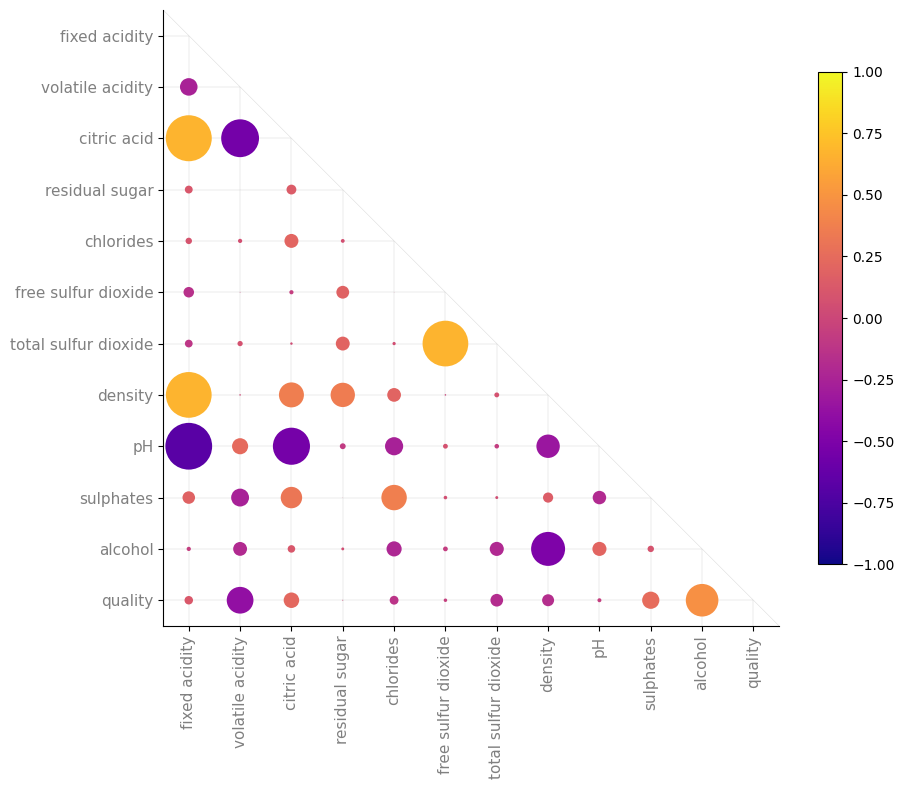

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection

import seaborn as sns

color_palette = "plasma"

# create a white grid with the same dimensions as the correlation matrix
corr_matrix = wine_quality.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor('white')

# create a mask for the lower triangle of the matrix (excluding the diagonal)
mask = np.tril(np.ones_like(corr_matrix, dtype=bool), k=-1)

# display the masked matrix
ax.imshow(np.ma.masked_where(mask, np.ones_like(corr_matrix)), cmap='gray_r', interpolation='nearest')

# set the tick labels and rotation for the x and y axes
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

# shift ticks of x axis to top of the graph
ax.tick_params(axis='x', rotation=90)

# format ticks
ax.set_yticklabels(corr_matrix.columns, fontsize=11, color="grey", 
                   )
ax.set_xticklabels(corr_matrix.columns, fontsize=11, color="grey", 
                   )

ax.grid(which="major", color="lightgray", linestyle="solid", linewidth=0.3)

# create circles with radius proportional to the absolute value of correlation
for i in range(len(corr_matrix.columns)):
    for j in range(0, i):  # <-- Only iterate over lower triangle
        correlation = corr_matrix.iat[i, j]
        norm = plt.Normalize(-1, 1) 
        sm = plt.cm.ScalarMappable(norm=norm, cmap=color_palette)
        color = sm.to_rgba(correlation)
        circle = Circle((j, i), radius=abs(correlation)/1.5, facecolor=color, zorder=2)
        ax.add_patch(circle)

# Add white triangle
triangle = Polygon([(len(corr_matrix.columns), -1), 
                    (len(corr_matrix.columns), 
                     len(corr_matrix.columns)),
                    (-1, -1)], closed=True, facecolor='white', zorder=2)  # zorder=2 to draw on top of lines
ax.add_patch(triangle)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

line = [(len(corr_matrix.columns), len(corr_matrix.columns)), (-1, -1)]
lc = LineCollection([line], color=["lightgray"], lw=0.3)
plt.gca().add_collection(lc)

# add color bar
norm = mcolors.Normalize(vmin=-1, vmax=1)
c_scale = plt.cm.ScalarMappable(norm=norm, cmap=color_palette)
cbar = plt.colorbar(c_scale, ax=ax, location = 'right', shrink=0.8)

plt.show()

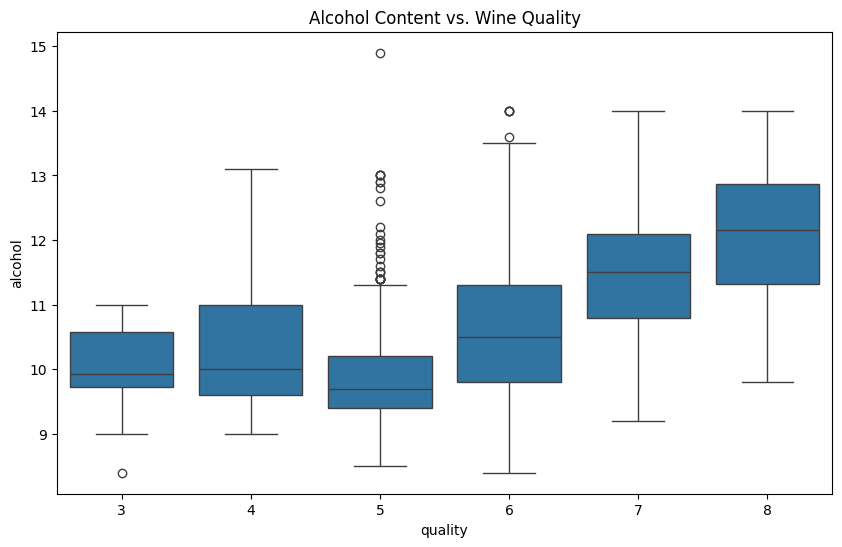

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_quality)
plt.title('Alcohol Content vs. Wine Quality')
plt.savefig('./images/ch07_18.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

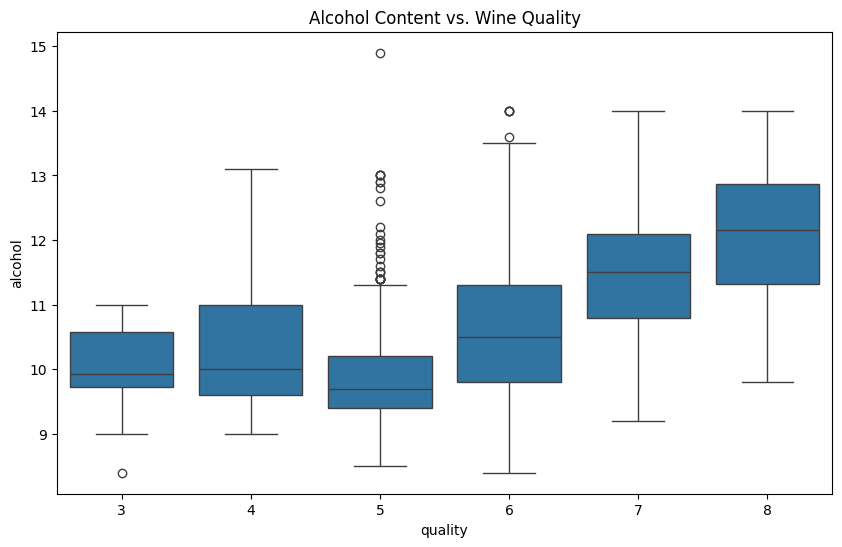

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_quality)
plt.title('Alcohol Content vs. Wine Quality')
plt.show()

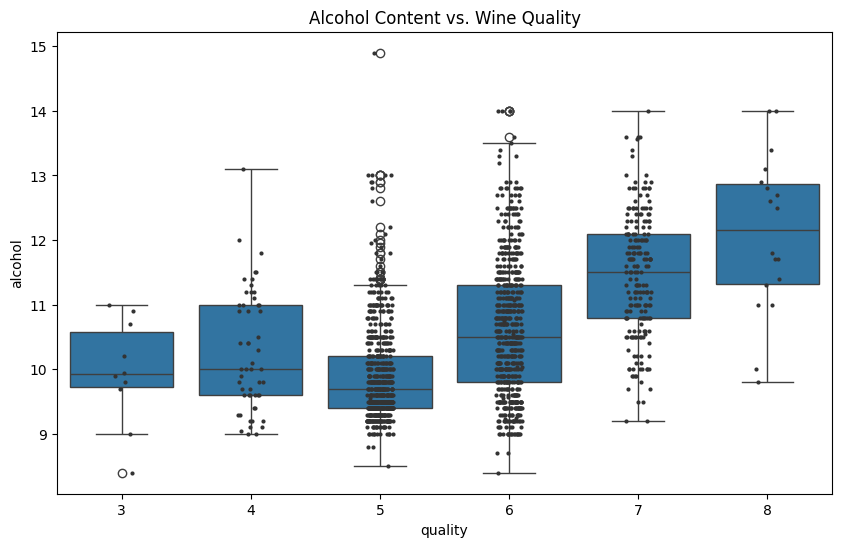

In [93]:
# Add in points to show each observation
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_quality)
sns.stripplot(x="quality", y="alcohol", data=wine_quality, size=3, color=".2", jitter=True)
plt.title('Alcohol Content vs. Wine Quality')
plt.show()


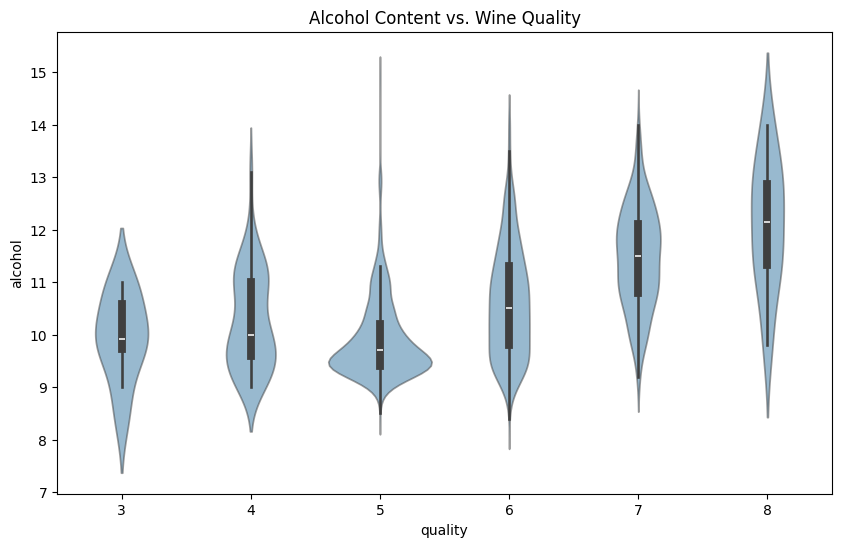

In [98]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='alcohol', data=wine_quality, alpha=0.5)
plt.title('Alcohol Content vs. Wine Quality')
plt.show()

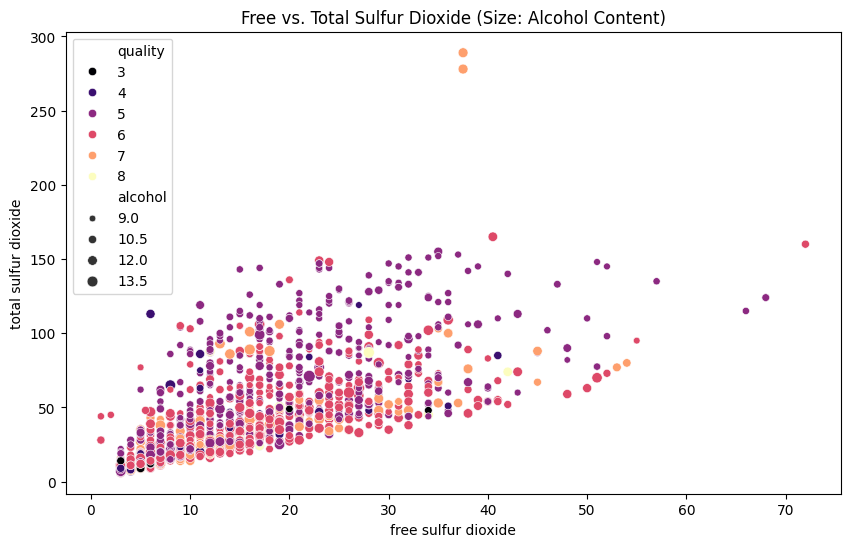

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', hue='quality', size='alcohol', data=wine_quality, palette='magma')
plt.title('Free vs. Total Sulfur Dioxide (Size: Alcohol Content)')
plt.savefig('./images/ch07_20.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

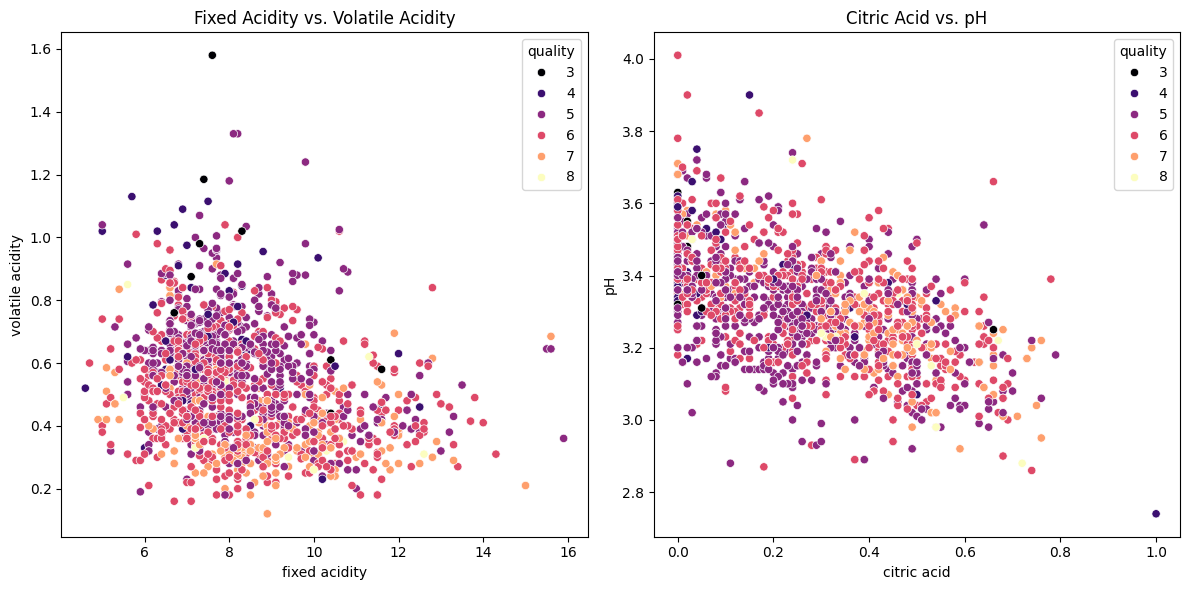

In [111]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='quality', data=wine_quality, palette='magma')
plt.title('Fixed Acidity vs. Volatile Acidity')

plt.subplot(1, 2, 2)
sns.scatterplot(x='citric acid', y='pH', hue='quality', data=wine_quality, palette='magma')
plt.title('Citric Acid vs. pH')
plt.tight_layout()
plt.savefig('./images/ch07_21.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

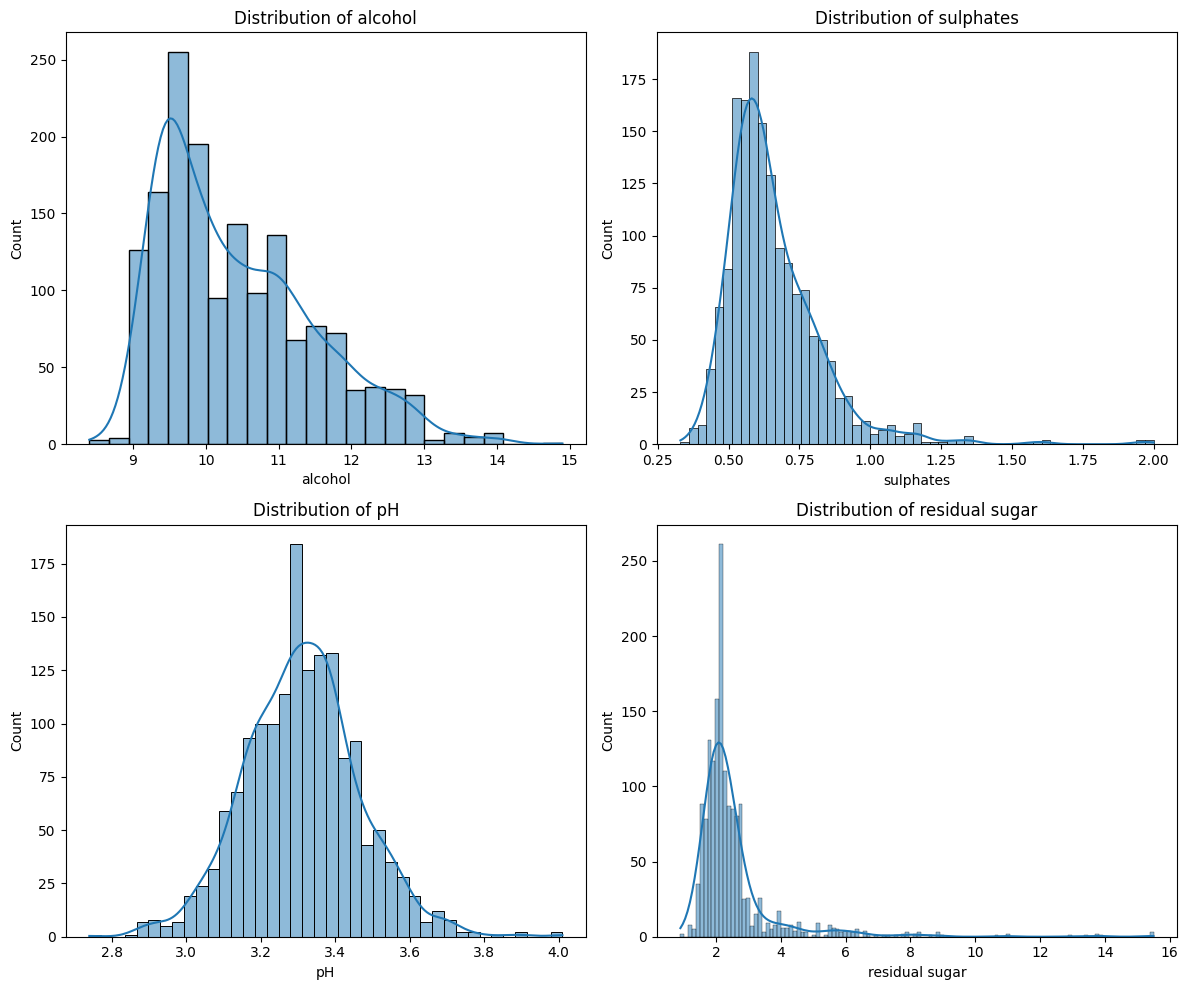

In [101]:
features = ['alcohol', 'sulphates', 'pH', 'residual sugar']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=wine_quality, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.savefig('./images/ch07_18.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

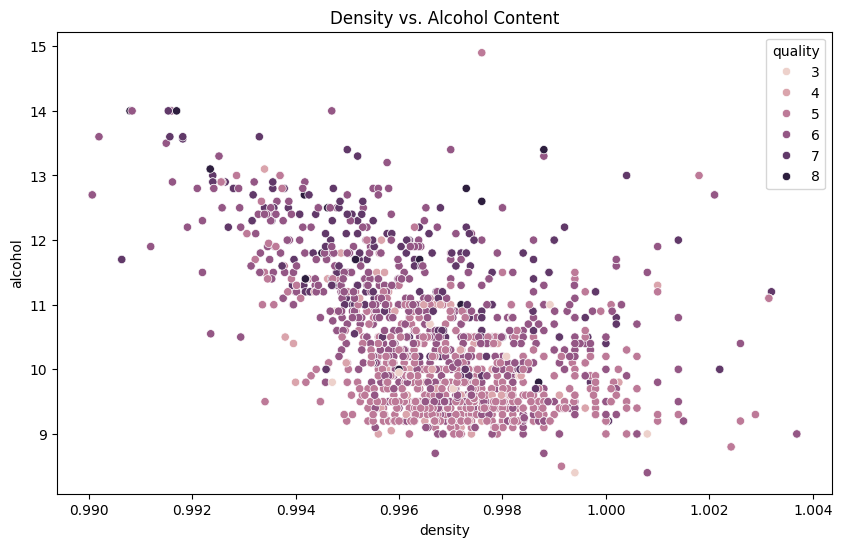

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', hue='quality', data=wine_quality)
plt.title('Density vs. Alcohol Content')
plt.show()

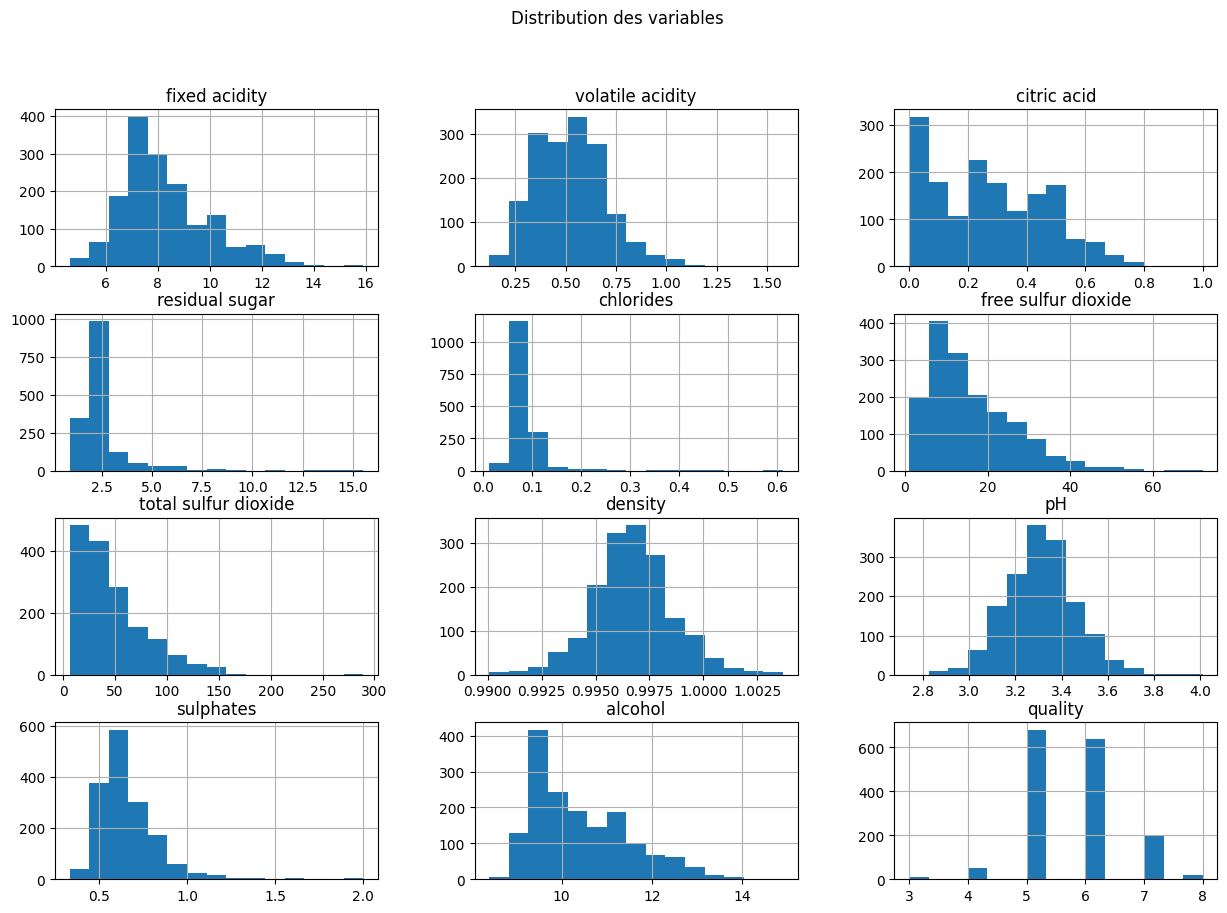

In [103]:
# Histogrammes des distributions des variables
wine_quality.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Distribution des variables")
plt.show()

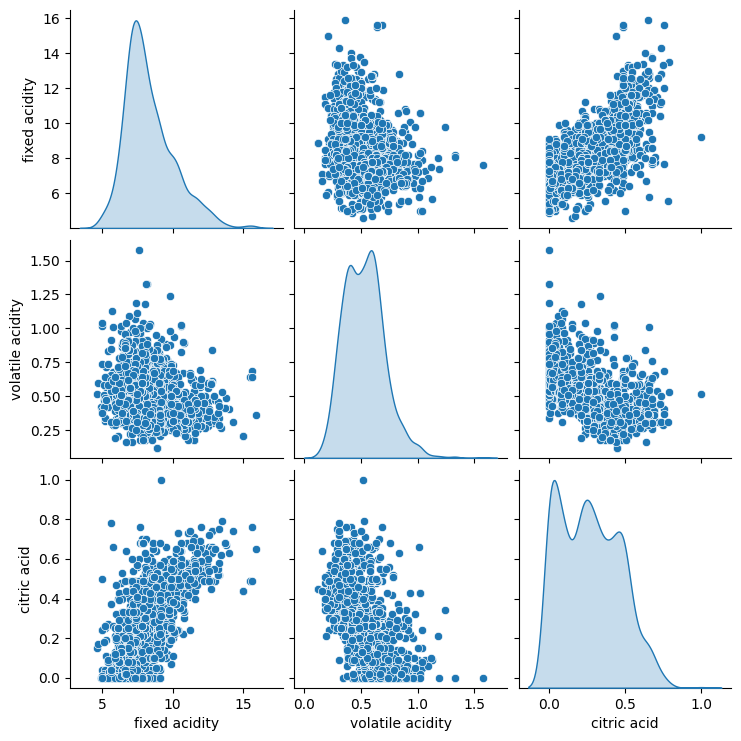

In [120]:
# Pairplot des variables
sns.pairplot(wine_quality.iloc[:,:3], kind='scatter', diag_kind='kde')
plt.savefig('./images/ch07_23.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

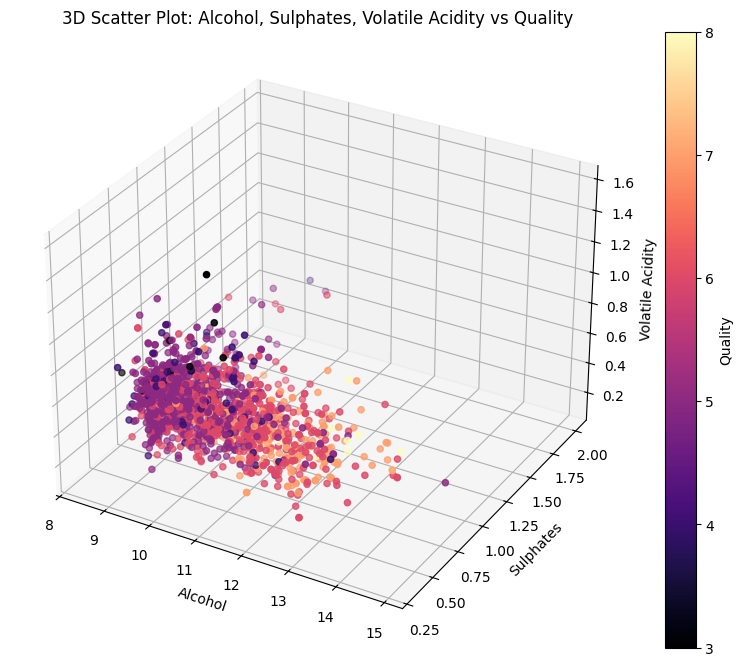

In [113]:

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
scatter = ax.scatter(wine_quality['alcohol'], wine_quality['sulphates'], wine_quality['volatile acidity'], c=wine_quality['quality'], cmap='magma')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Sulphates')
ax.set_zlabel('Volatile Acidity')
plt.colorbar(scatter, label='Quality')
plt.title('3D Scatter Plot: Alcohol, Sulphates, Volatile Acidity vs Quality')
plt.savefig('./images/ch07_22.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

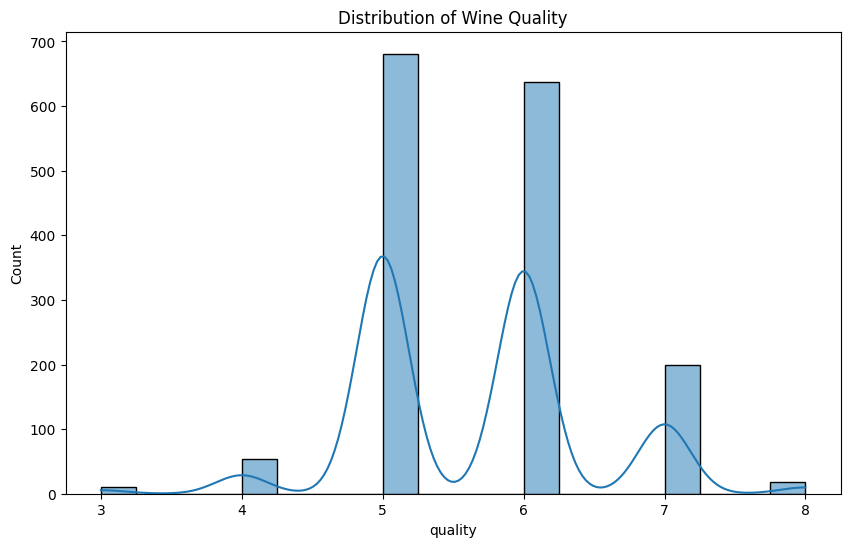

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


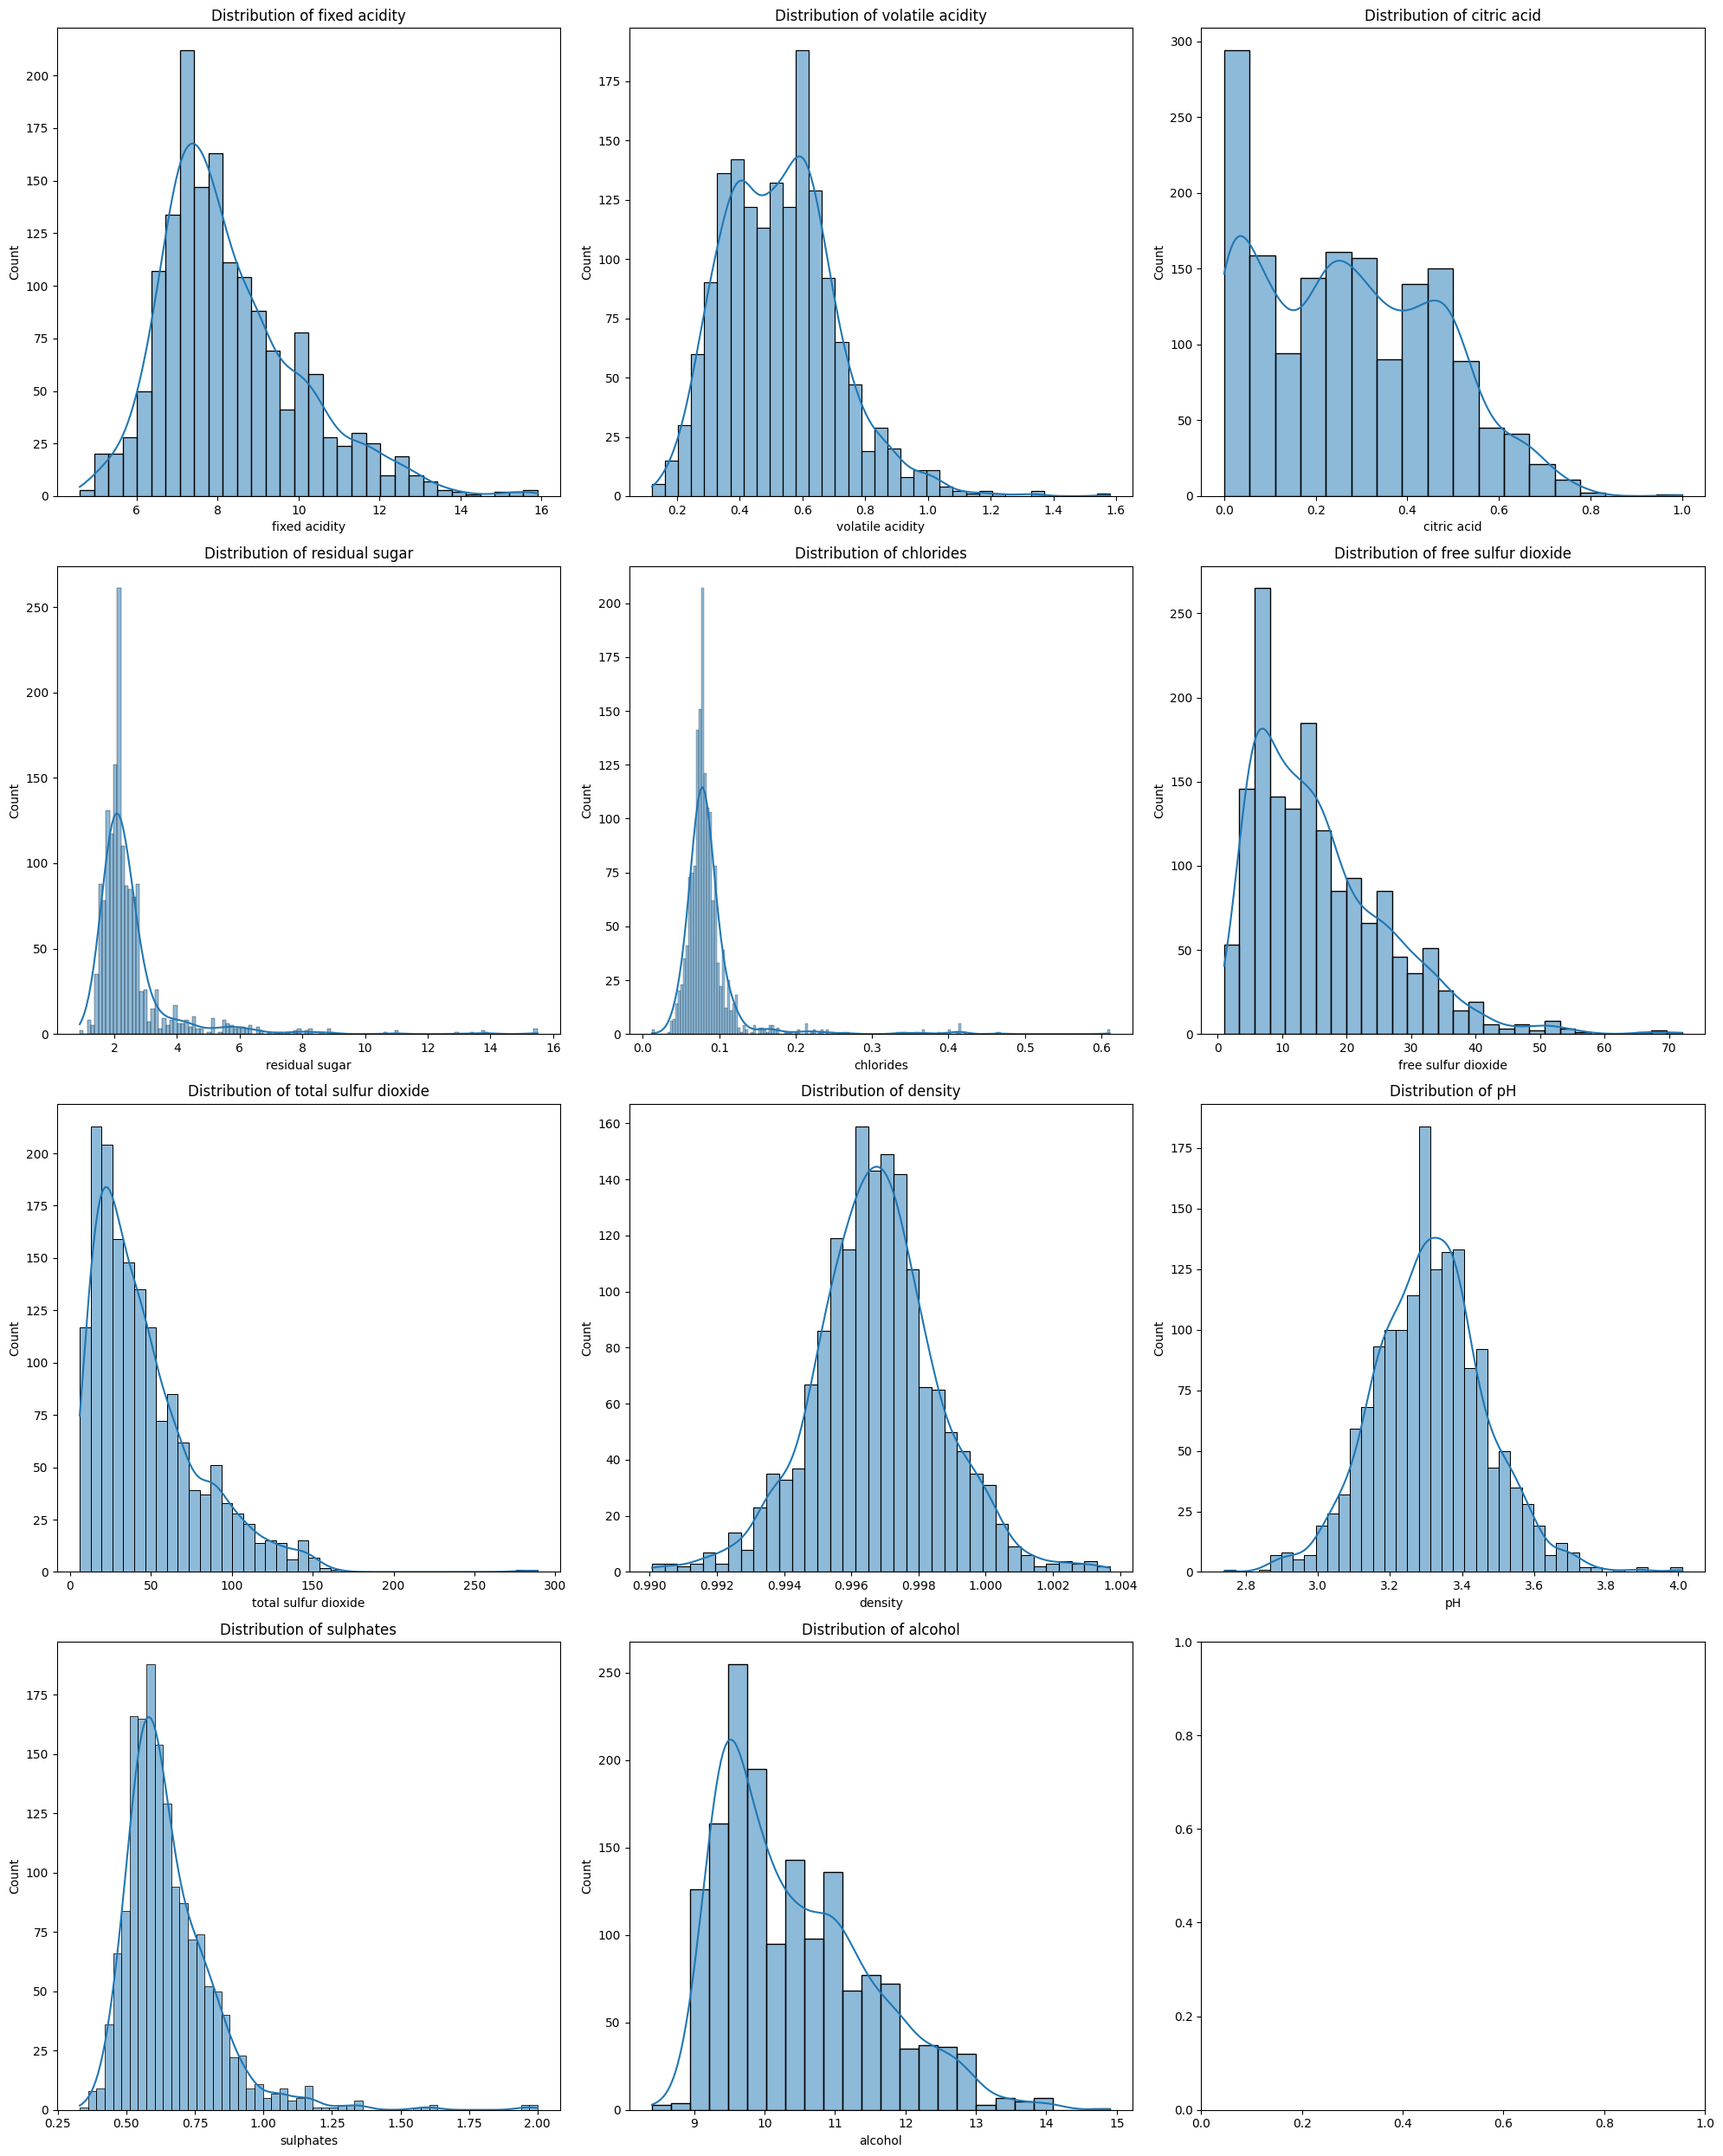

In [106]:
# Distribution of the target variable (quality)
plt.figure(figsize=(10, 6))
sns.histplot(data=wine_quality, x='quality', kde=True, bins=20)
plt.title('Distribution of Wine Quality')
plt.show()

# Descriptive statistics of quality
print(wine_quality['quality'].describe())

# Distribution of numerical features
numerical_features = wine_quality.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(4, 3, figsize=(20, 25))
axes = axes.ravel()

for i, col in enumerate(numerical_features):
    if col != 'quality':
        sns.histplot(data=wine_quality, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()